In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('train.csv')

In [5]:
df_train = df[['SQUARE_FT','PRICE_IN_LACS']]

In [6]:
#df_train

reg = LinearRegression()

In [7]:
reg.fit(df_train[['SQUARE_FT']],df_train.PRICE_IN_LACS)

LinearRegression()

In [14]:
reg.predict([[32443]])

array([144.65735165])

In [8]:
print(reg.coef_) 
print(reg.intercept_)

[0.00013912]
140.14384634954416


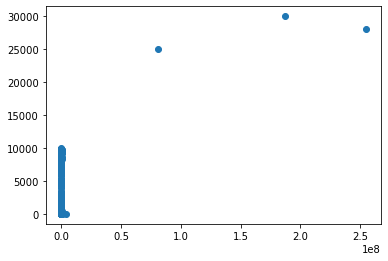

In [23]:
%matplotlib inline
plt.scatter(df_train.SQUARE_FT,df_train.PRICE_IN_LACS)

In [88]:
# y =mx + b
# m = coef_ = [0.00013912]
# reg.intercept_ = 140.14384634954416

# so for 32443
0.00013912 * 32443 +  140.14384634954416





144.65731650954416

In [89]:
# exercise
df_can = pd.read_csv('canada_per_capita_income.csv')

df_can['income'] = df_can['per capita income (US$)']
df_can = df_can.drop(columns = ['per capita income (US$)'])
df_can.head(5)
df_can.columns

Index(['year', 'income'], dtype='object')

In [90]:
df_can.tail(5)

,year,income
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [91]:
reg_can = LinearRegression()
reg_can.fit(df_can[['year']],df_can.income)

LinearRegression()

In [92]:
prediction = reg_can.predict([[2020]])

In [93]:
# canada per capita income in 2020
print (prediction)

[41288.69409442]


In [94]:
d = {"year": [2017, 2018, 2019, 2020]}
df_test = pd.DataFrame(d)

In [95]:
df_test

,year
0,2017
1,2018
2,2019
3,2020


In [96]:
predicted = reg_can.predict(df_test)
predicted

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442])

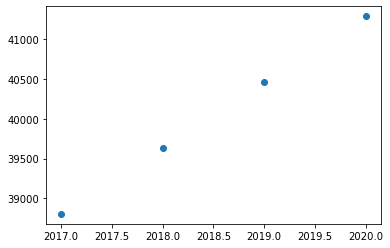

In [97]:
%matplotlib inline
plt.scatter(df_test,predicted)

df_test['income'] = predicted 

#df_can
#df_new = pd.concate([df_can, df_test] , axis = 'rows')

In [102]:
df_test

,year,income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094


In [115]:
df_new = (pd.concat([df_can,df_test], axis=0)).reset_index(drop=True)

In [120]:
df_new.to_csv('canada_per_capita_income_output.csv',index=False)

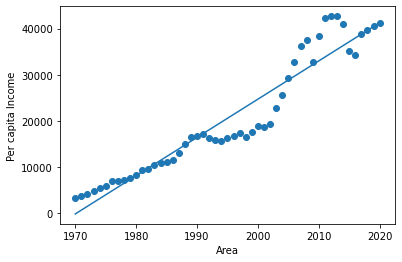

In [130]:
pred = reg_can.predict(df_new[['year']])
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Per capita Income')
plt.scatter(df_new.year,df_new.income)
plt.plot(df_new.year,pred)